<a href="https://colab.research.google.com/github/dnevo/Practicum/blob/master/S08_Supervised_learning_predict_bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Review

Now everything is great, so I can accept your project. Good luck in future learning

---

## Review

Hi Doron! My name is Soslan. I'm reviewing your work. I've added all my comments to new cells with the title "Review". My apologies for the delay in the review. We will be faster next time :)

```diff
+ If you did something great I'm using green color for my comment
- If the topic requires some extra work so I can accept it then the color will be red.
```

I think, your project is great. Evverything was done correctly. I want to ask you to add to your 

## Project description
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

Additionally, measure the AUC-ROC metric and compare it with the F1.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:11,.2f}'.format

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/Churn.csv',index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [3]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","9,091.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,690,940.57",650.53,38.92,5.00,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"15,628,528.25",584.00,32.00,2.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


As can be note above, there are missing values in the column `Tenure`

In [4]:
print(df['Geography'].value_counts(normalize=True))
print(df['Exited'].value_counts(normalize=True))

print(df[df['Tenure'].isna()]['Geography'].value_counts(normalize=True))
print(df[df['Tenure'].isna()]['Exited'].value_counts(normalize=True))

France           0.50
Germany          0.25
Spain            0.25
Name: Geography, dtype: float64
0          0.80
1          0.20
Name: Exited, dtype: float64
France           0.51
Spain            0.25
Germany          0.24
Name: Geography, dtype: float64
0          0.80
1          0.20
Name: Exited, dtype: float64


As noted above, the NaN rows are distributed similarely to the rest of the rows.
Therefore we can drop these rows:

In [5]:
df.dropna(inplace=True)
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"9,091.00","9,091.00","9,091.00","9,091.00","9,091.00","9,091.00","9,091.00","9,091.00","9,091.00","9,091.00"
mean,"15,691,053.16",650.74,38.95,5.00,"76,522.74",1.53,0.70,0.52,"100,181.21",0.20
std,"71,614.19",96.41,10.56,2.89,"62,329.53",0.58,0.46,0.50,"57,624.76",0.40
min,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"15,628,985.50",584.00,32.00,2.00,0.00,1.00,0.00,0.00,"51,227.74",0.00
50%,"15,691,061.00",652.00,37.00,5.00,"97,318.25",1.00,1.00,1.00,"100,240.20",0.00
75%,"15,752,851.50",717.00,44.00,7.00,"127,561.89",2.00,1.00,1.00,"149,567.21",0.00
max,"15,815,660.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


As above there are no missing values

In [6]:
df['Geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: Geography, dtype: int64

As above, customers are from just 3 countries and most of them are from France.

In [7]:
df['Exited'].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

As above, the classes are "out of balance" - ratio of 4 ('Exited' = 0) to 1 ('Exited' = 1)

Droping `CustomerId` and `Surname` from the data, since they have no added value in the modeling:

In [8]:
df.drop(columns=['CustomerId', 'Surname'],inplace=True)

OHE encoding for `Gender` and `Geography`:

In [9]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,
1,619,42,2.00,0.00,1,1,1,"101,348.88",1,0,0,0
2,608,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,0,1
3,502,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0,0
4,699,39,1.00,0.00,2,0,0,"93,826.63",0,0,0,0
5,850,43,2.00,"125,510.82",1,1,1,"79,084.10",0,0,0,1


The dataset is splitted into 3 groups according to the common practice: train 60%, Validation 20%, test 20%.

Since the `train_test_split` method is designed to split into only 2 groups, we are calling it twice in order to split to three.

In [10]:
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

In [11]:
def learning_curve(train_scores, valid_scores, param_range, target):
    plt.figure(figsize=(9, 9))
    targets = [target]* len(train_scores)
    plt.plot(param_range, train_scores, 'o-', color="r", label="Training")
    plt.plot(param_range, valid_scores, 'o-', color="b", label="Validation")
    plt.plot(param_range, targets,'-', color="g", label="Target")
    plt.ylabel('Score') 
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()

## Review

```diff
+ Nice first part. Everything was doone correctly.
```

---

# Models evaluation - without classes balancing

Logistic Regression without balancing - as bellow very poor results - F1=0.08

In [12]:
model = LogisticRegression(random_state=12345, class_weight=None)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.06779661016949153


Decision Tree without balancing - F1 score: 0.57

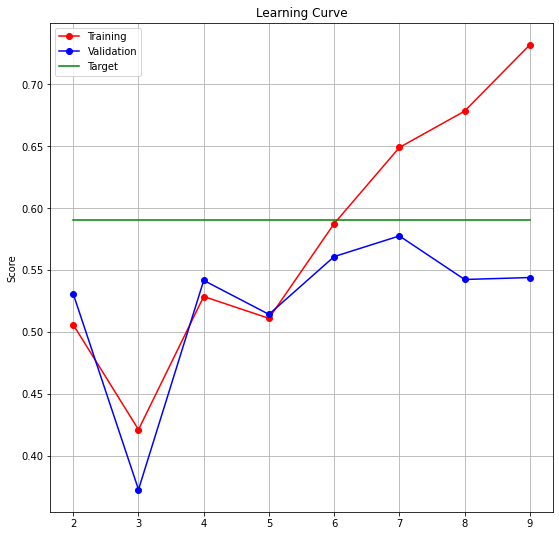

In [13]:
train_f1_scores = []
valid_f1_scores = []
param_range = []
for depth in range(2,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=None)
    model.fit(features_train, target_train)
    param_range.append(depth)
    train_f1_scores.append(f1_score(target_train, model.predict(features_train)))
    valid_f1_scores.append(f1_score(target_valid, model.predict(features_valid)))
learning_curve(train_f1_scores, valid_f1_scores, param_range, 0.59)

Random Forest, without balanced weight - find optimal `max_depth`, and afterwards find optimal `n_estimators`

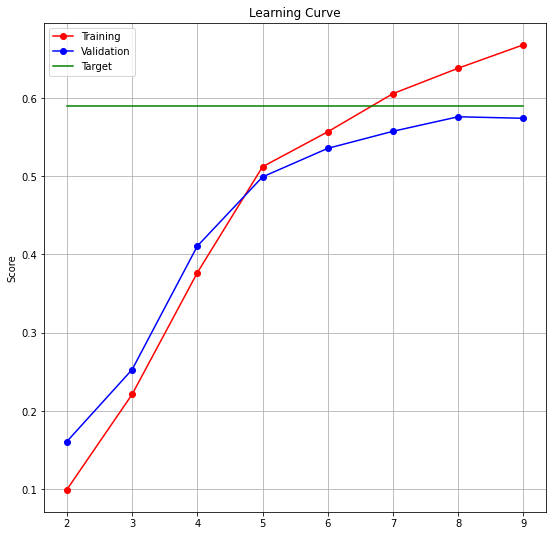

In [14]:
train_f1_scores = []
valid_f1_scores = []
param_range = []
for depth in range(2,10):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, class_weight=None)
    model.fit(features_train, target_train)
    param_range.append(depth)
    train_f1_scores.append(f1_score(target_train, model.predict(features_train)))
    valid_f1_scores.append(f1_score(target_valid, model.predict(features_valid)))
learning_curve(train_f1_scores, valid_f1_scores, param_range, 0.59)

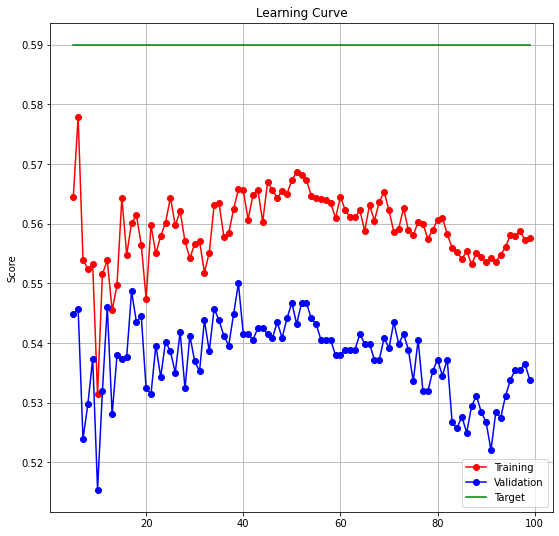

In [15]:
train_f1_scores = []
valid_f1_scores = []
param_range = []
for n_estim in range(5,100):
    model = RandomForestClassifier(random_state=12345, n_estimators=n_estim, class_weight=None, max_depth=6)
    model.fit(features_train, target_train)
    param_range.append(n_estim)
    train_f1_scores.append(f1_score(target_train, model.predict(features_train)))
    valid_f1_scores.append(f1_score(target_valid, model.predict(features_valid)))
learning_curve(train_f1_scores, valid_f1_scores, param_range, 0.59)

As above, without class balancing, the results are not so impressive.. much below target of 0.59!

# Models evaluation - WITH classes Upsampling

In [16]:
from sklearn.utils import shuffle

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [17]:
model = LogisticRegression()
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4776371308016877


As above, upsampling provides benefit comparing to initial logistic regression model...

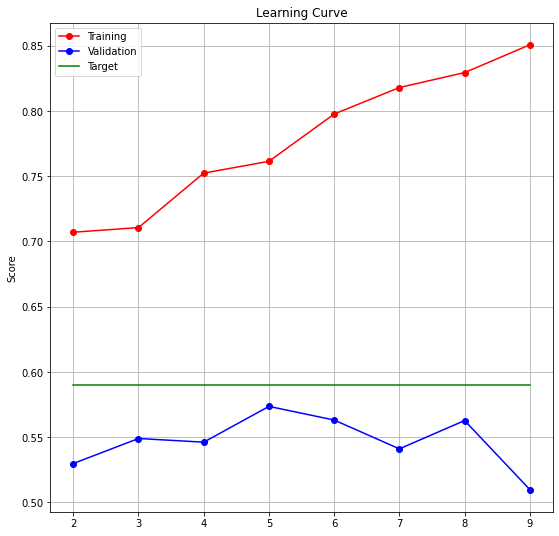

In [18]:
train_f1_scores = []
valid_f1_scores = []
param_range = []
for depth in range(2,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=None)
    model.fit(features_upsampled, target_upsampled)
    param_range.append(depth)
    train_f1_scores.append(f1_score(target_upsampled, model.predict(features_upsampled)))
    valid_f1_scores.append(f1_score(target_valid, model.predict(features_valid)))
learning_curve(train_f1_scores, valid_f1_scores, param_range, 0.59)

Upsampling provides some improvement for Decision Tree - but not enough to cross the desired target of 0.59

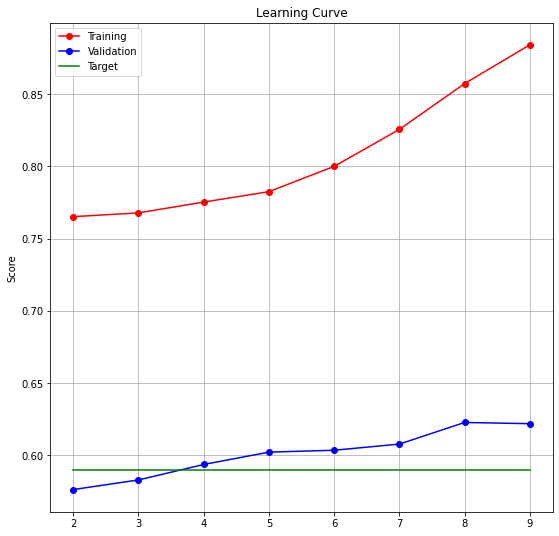

In [19]:
train_f1_scores = []
valid_f1_scores = []
param_range = []
for depth in range(2,10):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, class_weight=None)
    model.fit(features_upsampled, target_upsampled)
    param_range.append(depth)
    train_f1_scores.append(f1_score(target_upsampled, model.predict(features_upsampled)))
    valid_f1_scores.append(f1_score(target_valid, model.predict(features_valid)))
learning_curve(train_f1_scores, valid_f1_scores, param_range, 0.59)

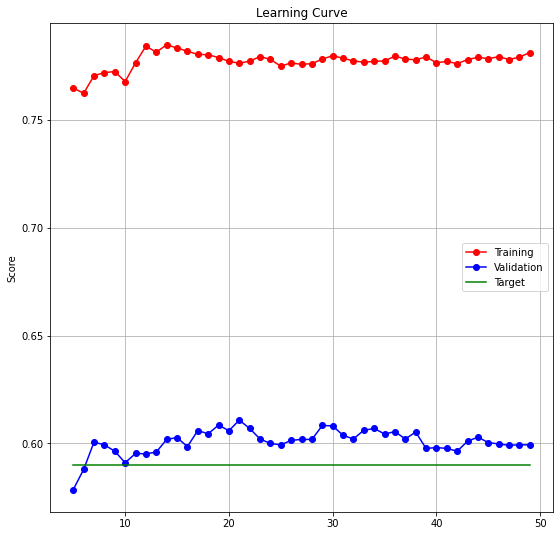

In [20]:
train_f1_scores = []
valid_f1_scores = []
param_range = []
for n_estim in range(5,50):
    model = RandomForestClassifier(random_state=12345, n_estimators=n_estim, class_weight=None, max_depth=5)
    model.fit(features_upsampled, target_upsampled)
    param_range.append(n_estim)
    train_f1_scores.append(f1_score(target_upsampled, model.predict(features_upsampled)))
    valid_f1_scores.append(f1_score(target_valid, model.predict(features_valid)))
learning_curve(train_f1_scores, valid_f1_scores, param_range, 0.59)

Random Forrest with Upsampling: although that according to above plot, crossing the score target of 0.59 is achieve, the result is not satisfactory, since there is a big gab between the test set score and the validation set (~ 15%) - indicating overfitting.

# Models evaluation - WITH classes balancing

Logistic Regression with balancing - as bellow poor results - F1=0.49

In [21]:
model = LogisticRegression(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.3595667870036101


Decision Tree with balancing - F1 score: 0.575 - below target of 0.59

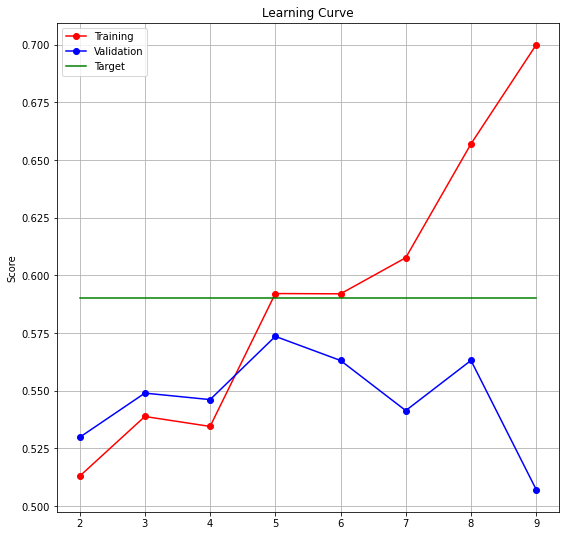

In [22]:
train_f1_scores = []
valid_f1_scores = []
param_range = []
for depth in range(2,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    param_range.append(depth)
    train_f1_scores.append(f1_score(target_train, model.predict(features_train)))
    valid_f1_scores.append(f1_score(target_valid, model.predict(features_valid)))
learning_curve(train_f1_scores, valid_f1_scores, param_range, 0.59)

Random Forest, with balanced weight - find optimal `max_depth`

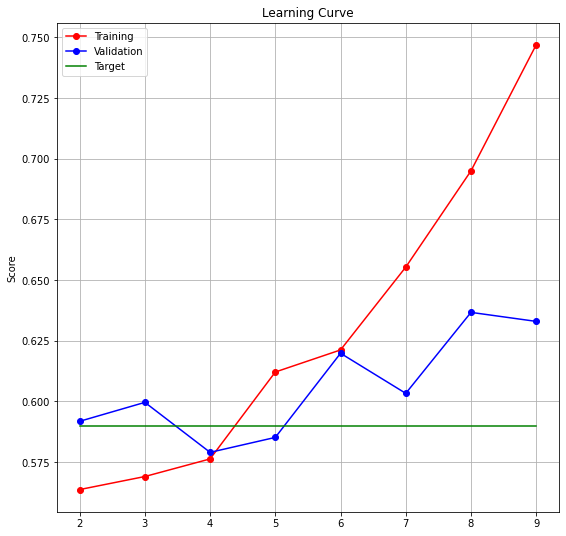

In [23]:
train_f1_scores = []
valid_f1_scores = []
param_range = []
for depth in range(2,10):
    model = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    param_range.append(depth)
    train_f1_scores.append(f1_score(target_train, model.predict(features_train)))
    valid_f1_scores.append(f1_score(target_valid, model.predict(features_valid)))
learning_curve(train_f1_scores, valid_f1_scores, param_range, 0.59)

After we found optimal depth (to be 6), we will search for optimal `n_estimators`

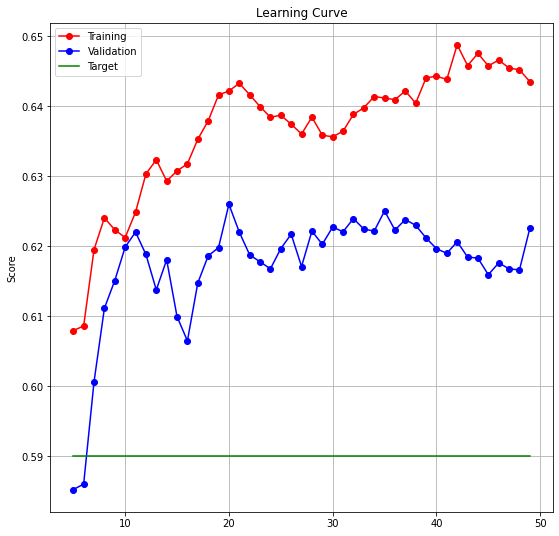

In [24]:
train_f1_scores = []
valid_f1_scores = []
param_range = []
for n_estim in range(5,50):
    model = RandomForestClassifier(random_state=12345, n_estimators=n_estim, class_weight='balanced', max_depth=6)
    model.fit(features_train, target_train)
    param_range.append(n_estim)
    train_f1_scores.append(f1_score(target_train, model.predict(features_train)))
    valid_f1_scores.append(f1_score(target_valid, model.predict(features_valid)))
learning_curve(train_f1_scores, valid_f1_scores, param_range, 0.59)

n_estim = 35 is the optimal. (for higher values, the gap between f1_valid and f1_train start to grow, implying overvitting is accumulating!)

RandomForest - after hyperparameters optimization, check `F1` and `ROC-AUC` on Test set:

In [25]:
model = RandomForestClassifier(random_state=12345, n_estimators=35, class_weight='balanced', max_depth=6)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
print('Test set F1', f1_score(target_test, predictions_test))
print('Test set ROC-AUC', roc_auc_score(target_test, predictions_test))

Test set F1 0.5952941176470588
Test set ROC-AUC 0.7766113944588059


As above, F1 is 0.595 which is satisfactory (above target of 0.59), and ROC-AUC is 0.776 (comparing to random model: 0.5)

## Review

```diff
+ Nice research, and informative plots.
- Can you please add to your research at least one of the methods of class balancing - upsampling and downsampling. Adding booth are also ok.
```

---

# Conclusions
- The classes are unbalanced with ration of 4:1
- by using class weighting we were able to achieve satisfactory results (F1=0.595, ROC-AUC=0.776)
- Three models were evaluated: Logistic Regression, Decision Tree and Random Forest
Random Forest is the winner!